In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from pprint import pprint
%matplotlib inline

In [2]:
start = datetime(2000,1,1)
end = datetime(2014,1,1)
test_size=0.2

In [3]:
amzn = pdr.get_data_yahoo('AAPL', start, end)
amzn.drop(['Close', 'Volume'], axis=1, inplace=True)

In [4]:
amzn.columns = ['Open', 'High', 'Low', 'Close'] # Adj Close -> Close

In [5]:
amzn.head()

,Open,High,Low,Close
Date,,,,
1999-12-31,3.604911,3.674107,3.553571,3.303425
2000-01-03,3.745536,4.017857,3.631696,3.596616
2000-01-04,3.866071,3.950893,3.613839,3.293384
2000-01-05,3.705357,3.948661,3.678571,3.341579
2000-01-06,3.790179,3.821429,3.392857,3.052405


### Create percentage change list

In [6]:
amzn_pct = pd.concat((amzn, 
                      amzn.rolling(5, center=False, min_periods=5).mean(), 
                      amzn.rolling(10, center=False, min_periods=10).mean(), 
                      amzn.rolling(20, center=False, min_periods=20).mean(),
                      amzn.rolling(5, center=False, min_periods=5).std(), 
                      amzn.rolling(10, center=False, min_periods=10).std(),
                      amzn.rolling(20, center=False, min_periods=20).std()), 
                      axis=1)

In [7]:
amzn_pct.head()

,Open,High,Low,Close,Open,High,Low,Close,Open,High,...,Low,Close,Open,High,Low,Close,Open,High,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,3.604911,3.674107,3.553571,3.303425,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,3.745536,4.017857,3.631696,3.596616,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,3.866071,3.950893,3.613839,3.293384,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3.705357,3.948661,3.678571,3.341579,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,3.790179,3.821429,3.392857,3.052405,3.742411,3.882589,3.574107,3.317482,NaN,NaN,...,0.110771,0.193352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
amzn_pct = amzn_pct.pct_change()[20:]

In [9]:
amzn_pct.head()

,Open,High,Low,Close,Open,High,Low,Close,Open,High,...,Low,Close,Open,High,Low,Close,Open,High,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.066435,-0.063134,-0.060870,0.020910,-0.013762,-0.015738,-0.020243,-0.004627,0.000929,0.001455,...,0.629776,0.095162,-0.032405,-0.059454,0.173592,-0.106839,-0.000296,-0.005391,0.019466,-0.000053
2000-02-01,0.029703,0.010830,0.058201,-0.033735,-0.001876,-0.014638,-0.004618,-0.022313,0.002783,-0.000894,...,0.023934,0.015834,-0.079920,0.028605,0.006815,0.131952,-0.000282,-0.009372,-0.000998,-0.036954
2000-02-02,-0.031250,-0.027381,-0.030000,-0.014339,-0.017387,-0.022055,-0.024908,-0.021633,-0.004510,-0.005929,...,-0.222819,-0.063940,0.119014,0.159707,0.087622,0.168929,-0.005390,0.009811,0.004842,0.008228
2000-02-03,-0.004342,0.020808,0.033505,0.045541,-0.016260,-0.016359,-0.013524,-0.013000,-0.014116,-0.015531,...,-0.436727,-0.526676,-0.075139,-0.162674,-0.148123,-0.087002,0.008528,-0.003489,-0.004903,-0.000810
2000-02-04,0.036137,0.055156,0.033666,0.045372,-0.008264,-0.001663,0.006093,0.012555,-0.009722,-0.003887,...,0.309939,0.718471,-0.211697,-0.060756,-0.129017,-0.063956,-0.004547,0.005933,-0.007717,-0.019756


In [10]:
scale_to_idx = int((1-test_size)*len(amzn_pct))
scale_to_idx

2801

In [11]:
scaler = StandardScaler()
scaler.fit(amzn_pct.iloc[:scale_to_idx])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
amzn_pct = pd.DataFrame(scaler.transform(amzn_pct), columns=amzn_pct.columns, index=amzn_pct.index)

In [13]:
amzn_pct.head(6)

,Open,High,Low,Close,Open,High,Low,Close,Open,High,...,Low,Close,Open,High,Low,Close,Open,High,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-2.189347,-2.431187,-2.164882,0.638893,-1.091431,-1.274546,-1.539185,-0.407527,-0.003600,0.050969,...,0.805673,0.006686,-0.237513,-0.340735,0.668205,-0.578985,-0.054978,-0.108027,0.156501,-0.053560
2000-02-01,0.913874,0.361328,1.977835,-1.151468,-0.212662,-1.190727,-0.407512,-1.688102,0.181834,-0.187370,...,-0.117473,-0.130617,-0.450440,0.022177,-0.067128,0.504498,-0.054836,-0.148244,-0.063201,-0.446762
2000-02-02,-1.053612,-1.081337,-1.090868,-0.515997,-1.359458,-1.756082,-1.877105,-1.638910,-0.547394,-0.698185,...,-0.493460,-0.268691,0.441035,0.562478,0.289157,0.672277,-0.109521,0.045540,-0.000498,0.034676
2000-02-03,-0.185067,0.738024,1.118605,1.445876,-1.276133,-1.321911,-1.052519,-1.013777,-1.507690,-1.672240,...,-0.819401,-1.069605,-0.429012,-0.766129,-0.750264,-0.488978,0.039503,-0.088815,-0.105128,-0.061630
2000-02-04,1.121563,2.034823,1.124202,1.440362,-0.684973,-0.201674,0.368298,0.836600,-1.068416,-0.490968,...,0.318324,1.085523,-1.040965,-0.346102,-0.666025,-0.384409,-0.100498,0.006369,-0.135338,-0.263512
2000-02-07,1.216741,1.411137,0.729314,1.792964,0.940832,1.430797,1.599278,1.379874,-0.138086,0.043055,...,-0.153944,1.137985,-0.144987,0.047987,-0.031558,0.651974,-0.337361,0.002965,-0.038310,0.497654


### Helper class and functions

In [14]:
class TradeDTO:
    
    LONG = 'long'
    SHORT = 'short'
    
    def __init__(self, pct_data, enter_day, exit_day):
        self.pct_data = pct_data
        self.enter_day = enter_day
        self.exit_day = exit_day
        
        self.hold_days = len(amzn[self.enter_day.name:self.exit_day.name]) - 1
        self.price_diff = self.exit_day['Close'] - self.enter_day['Close']
        self.direction = TradeDTO.LONG if self.price_diff > 0 else TradeDTO.SHORT
        
    def __repr__(self):
        return 'From {} to {} | enter {} | exit {} | {} | {} hold days | {} diff'.format(
            self.pct_data.iloc[0].name.date(),
            self.pct_data.iloc[-1].name.date(),
            self.enter_day.name.date(),
            self.exit_day.name.date(),
            self.direction,
            self.hold_days,
            self.price_diff)
    
    def to_label(self):
        return self.direction + '_' + str(self.hold_days)# + '_' + ('BREAKOUT' if self.hold_days <= 1 else 'NOPE')

### Parameters for trade collecting

In [15]:
min_hold_days = 1
max_hold_days = 10
hold_days_diff = max_hold_days - min_hold_days
window = 30

In [16]:
positions = []
for i in range(window, len(amzn_pct) - max_hold_days):
    pct_data_part = amzn_pct.iloc[i - window : i]
    last_index_of_pct_data_part = pct_data_part.iloc[-1].name.date()
    
    start_idx = amzn.index.get_loc(last_index_of_pct_data_part)
    
    current_day = amzn.iloc[start_idx]
    check_data_part = amzn.iloc[start_idx + min_hold_days : 
                                start_idx + max_hold_days]
    
    max_ev_date = np.argmax(np.abs(current_day['Close'] - check_data_part['Close']))
    target_day = check_data_part.loc[max_ev_date]
    
    #print('- {} days: {} to {}'.format(str(day_diff), current_day.name.date(), target_day.name.date()))
    trade = TradeDTO(pct_data_part, current_day, target_day)
    positions.append(trade)

In [17]:
#np.random.shuffle(positions)

In [18]:
pprint(positions)

[From 2000-01-31 to 2000-03-13 | enter 2000-03-13 | exit 2000-03-22 | long | 7 hold days | 0.7349890000000001 diff,
 From 2000-02-01 to 2000-03-14 | enter 2000-03-14 | exit 2000-03-22 | long | 6 hold days | 0.9619110000000002 diff,
 From 2000-02-02 to 2000-03-15 | enter 2000-03-15 | exit 2000-03-22 | long | 5 hold days | 0.8976500000000001 diff,
 From 2000-02-03 to 2000-03-16 | enter 2000-03-16 | exit 2000-03-22 | long | 4 hold days | 0.7269559999999999 diff,
 From 2000-02-04 to 2000-03-17 | enter 2000-03-17 | exit 2000-03-22 | long | 3 hold days | 0.6165080000000005 diff,
 From 2000-02-07 to 2000-03-20 | enter 2000-03-20 | exit 2000-03-22 | long | 2 hold days | 0.6807690000000002 diff,
 From 2000-02-08 to 2000-03-21 | enter 2000-03-21 | exit 2000-03-22 | long | 1 hold days | 0.29720999999999975 diff,
 From 2000-02-09 to 2000-03-22 | enter 2000-03-22 | exit 2000-03-30 | short | 6 hold days | -0.5924100000000001 diff,
 From 2000-02-10 to 2000-03-23 | enter 2000-03-23 | exit 2000-03-30 |

 From 2000-06-16 to 2000-07-28 | enter 2000-07-28 | exit 2000-07-31 | long | 1 hold days | 0.16065300000000038 diff,
 From 2000-06-19 to 2000-07-31 | enter 2000-07-31 | exit 2000-08-08 | short | 6 hold days | -0.2610619999999999 diff,
 From 2000-06-20 to 2000-08-01 | enter 2000-08-01 | exit 2000-08-08 | short | 5 hold days | -0.16466999999999965 diff,
 From 2000-06-21 to 2000-08-02 | enter 2000-08-02 | exit 2000-08-03 | long | 1 hold days | 0.048195999999999906 diff,
 From 2000-06-22 to 2000-08-03 | enter 2000-08-03 | exit 2000-08-15 | short | 8 hold days | -0.08434300000000006 diff,
 From 2000-06-23 to 2000-08-04 | enter 2000-08-04 | exit 2000-08-17 | long | 9 hold days | 0.26106000000000007 diff,
 From 2000-06-26 to 2000-08-07 | enter 2000-08-07 | exit 2000-08-17 | long | 8 hold days | 0.22491400000000006 diff,
 From 2000-06-27 to 2000-08-08 | enter 2000-08-08 | exit 2000-08-17 | long | 7 hold days | 0.30122399999999994 diff,
 From 2000-06-28 to 2000-08-09 | enter 2000-08-09 | exit 2

 From 2004-10-04 to 2004-11-12 | enter 2004-11-12 | exit 2004-11-26 | long | 9 hold days | 0.5815629999999996 diff,
 From 2004-10-05 to 2004-11-15 | enter 2004-11-15 | exit 2004-11-29 | long | 9 hold days | 0.8482469999999998 diff,
 From 2004-10-06 to 2004-11-16 | enter 2004-11-16 | exit 2004-11-29 | long | 8 hold days | 0.8675249999999997 diff,
 From 2004-10-07 to 2004-11-17 | enter 2004-11-17 | exit 2004-11-29 | long | 7 hold days | 0.8700959999999998 diff,
 From 2004-10-08 to 2004-11-18 | enter 2004-11-18 | exit 2004-11-29 | long | 6 hold days | 0.8386079999999998 diff,
 From 2004-10-11 to 2004-11-19 | enter 2004-11-19 | exit 2004-11-29 | long | 5 hold days | 0.852744 diff,
 From 2004-10-12 to 2004-11-22 | enter 2004-11-22 | exit 2004-11-29 | long | 4 hold days | 0.4556099999999996 diff,
 From 2004-10-13 to 2004-11-23 | enter 2004-11-23 | exit 2004-11-29 | long | 3 hold days | 0.46075100000000013 diff,
 From 2004-10-14 to 2004-11-24 | enter 2004-11-24 | exit 2004-11-29 | long | 2 ho

 From 2009-07-08 to 2009-08-18 | enter 2009-08-18 | exit 2009-08-28 | long | 8 hold days | 0.7775590000000001 diff,
 From 2009-07-09 to 2009-08-19 | enter 2009-08-19 | exit 2009-08-28 | long | 7 hold days | 0.700448999999999 diff,
 From 2009-07-10 to 2009-08-20 | enter 2009-08-20 | exit 2009-08-28 | long | 6 hold days | 0.4781039999999983 diff,
 From 2009-07-13 to 2009-08-21 | enter 2009-08-21 | exit 2009-09-02 | short | 8 hold days | -0.5192340000000009 diff,
 From 2009-07-14 to 2009-08-24 | enter 2009-08-24 | exit 2009-09-02 | short | 7 hold days | -0.4986670000000011 diff,
 From 2009-07-15 to 2009-08-25 | enter 2009-08-25 | exit 2009-09-02 | short | 6 hold days | -0.5423700000000018 diff,
 From 2009-07-16 to 2009-08-26 | enter 2009-08-26 | exit 2009-09-08 | long | 8 hold days | 0.7094439999999977 diff,
 From 2009-07-17 to 2009-08-27 | enter 2009-08-27 | exit 2009-09-02 | short | 4 hold days | -0.5487900000000003 diff,
 From 2009-07-20 to 2009-08-28 | enter 2009-08-28 | exit 2009-09-

# Train Keras NN

### Setup X_train, X_test, etc

In [19]:
X = np.array([x.pct_data.values for x in positions])
X.shape

(3462, 30, 28)

In [20]:
lb = LabelBinarizer()
y = lb.fit_transform([x.to_label() for x in positions])
if y.shape[1] == 1:
    y = np.hstack((y, 1 - y))
y.shape

(3462, 18)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

Scaling dataset size should be equal to the train set + window size

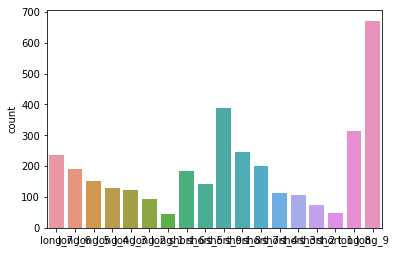

In [22]:
sns.countplot([x.to_label() for x in positions])

### Build model

In [23]:
batch_size = 128
epochs = 150

In [24]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.losses import mean_squared_error, categorical_crossentropy
from keras.optimizers import Adam
from keras import metrics

Using TensorFlow backend.


In [25]:
model = Sequential()
model.add(Conv1D(32,  3, activation='relu', padding='same', input_shape=X[0].shape))
model.add(Conv1D(64,  4, activation='relu', padding='same'))
model.add(Conv1D(128, 5, activation='relu', padding='same'))
model.add(Conv1D(256, 6, activation='relu', padding='same'))

In [26]:
model.add(Flatten())

for i in range(6,0,-1):
    model.add(Dense(i*64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

model.add(Dense(y.shape[1]))
model.add(Activation('softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=[metrics.mae, metrics.categorical_accuracy])

In [27]:
import os.path
FILE_PATH = 'AAPL.hdf5'

In [28]:
if os.path.exists(FILE_PATH):
    model.load_weights(FILE_PATH)
else:
    # Fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)
    model.save_weights(FILE_PATH, overwrite=True)

Train on 2769 samples, validate on 693 samples
Epoch 1/150
2769/2769 [==============================] - 7s - loss: 2.8540 - mean_absolute_error: 0.1042 - categorical_accuracy: 0.1181 - val_loss: 2.7854 - val_mean_absolute_error: 0.1041 - val_categorical_accuracy: 0.2020
Epoch 2/150
2769/2769 [==============================] - 1s - loss: 2.7733 - mean_absolute_error: 0.1033 - categorical_accuracy: 0.1712 - val_loss: 2.7245 - val_mean_absolute_error: 0.1035 - val_categorical_accuracy: 0.2020
Epoch 3/150
2769/2769 [==============================] - 1s - loss: 2.7279 - mean_absolute_error: 0.1025 - categorical_accuracy: 0.1867 - val_loss: 2.6917 - val_mean_absolute_error: 0.1030 - val_categorical_accuracy: 0.2020
Epoch 4/150
2769/2769 [==============================] - 1s - loss: 2.7032 - mean_absolute_error: 0.1019 - categorical_accuracy: 0.1874 - val_loss: 2.6682 - val_mean_absolute_error: 0.1026 - val_categorical_accuracy: 0.2020
Epoch 5/150
2769/2769 [==============================] - 

2769/2769 [==============================] - 1s - loss: 1.6077 - mean_absolute_error: 0.0738 - categorical_accuracy: 0.4092 - val_loss: 4.7744 - val_mean_absolute_error: 0.1039 - val_categorical_accuracy: 0.0996
Epoch 38/150
2769/2769 [==============================] - 1s - loss: 1.5593 - mean_absolute_error: 0.0729 - categorical_accuracy: 0.4258 - val_loss: 4.9569 - val_mean_absolute_error: 0.1046 - val_categorical_accuracy: 0.0909
Epoch 39/150
2769/2769 [==============================] - 1s - loss: 1.5144 - mean_absolute_error: 0.0715 - categorical_accuracy: 0.4511 - val_loss: 5.3440 - val_mean_absolute_error: 0.1035 - val_categorical_accuracy: 0.1097
Epoch 40/150
2769/2769 [==============================] - 1s - loss: 1.5600 - mean_absolute_error: 0.0724 - categorical_accuracy: 0.4337 - val_loss: 5.2471 - val_mean_absolute_error: 0.1038 - val_categorical_accuracy: 0.1053
Epoch 41/150
2769/2769 [==============================] - 1s - loss: 1.5063 - mean_absolute_error: 0.0710 - categ

2769/2769 [==============================] - 1s - loss: 1.0321 - mean_absolute_error: 0.0519 - categorical_accuracy: 0.6096 - val_loss: 8.1824 - val_mean_absolute_error: 0.1031 - val_categorical_accuracy: 0.0952
Epoch 74/150
2769/2769 [==============================] - 1s - loss: 1.0135 - mean_absolute_error: 0.0506 - categorical_accuracy: 0.6215 - val_loss: 8.2668 - val_mean_absolute_error: 0.1027 - val_categorical_accuracy: 0.0880
Epoch 75/150
2769/2769 [==============================] - 1s - loss: 0.9740 - mean_absolute_error: 0.0505 - categorical_accuracy: 0.6176 - val_loss: 8.0231 - val_mean_absolute_error: 0.1030 - val_categorical_accuracy: 0.0924
Epoch 76/150
2769/2769 [==============================] - 1s - loss: 0.9404 - mean_absolute_error: 0.0487 - categorical_accuracy: 0.6273 - val_loss: 8.4115 - val_mean_absolute_error: 0.1019 - val_categorical_accuracy: 0.1010
Epoch 77/150
2769/2769 [==============================] - 1s - loss: 0.9712 - mean_absolute_error: 0.0491 - categ

2769/2769 [==============================] - 1s - loss: 0.6876 - mean_absolute_error: 0.0383 - categorical_accuracy: 0.7291 - val_loss: 9.9891 - val_mean_absolute_error: 0.1030 - val_categorical_accuracy: 0.0693
Epoch 110/150
2769/2769 [==============================] - 1s - loss: 0.7252 - mean_absolute_error: 0.0388 - categorical_accuracy: 0.7133 - val_loss: 9.8498 - val_mean_absolute_error: 0.1033 - val_categorical_accuracy: 0.0592
Epoch 111/150
2769/2769 [==============================] - 1s - loss: 0.7053 - mean_absolute_error: 0.0387 - categorical_accuracy: 0.7237 - val_loss: 10.1757 - val_mean_absolute_error: 0.1020 - val_categorical_accuracy: 0.0837
Epoch 112/150
2769/2769 [==============================] - 1s - loss: 0.7150 - mean_absolute_error: 0.0388 - categorical_accuracy: 0.7295 - val_loss: 10.3763 - val_mean_absolute_error: 0.1023 - val_categorical_accuracy: 0.0693
Epoch 113/150
2769/2769 [==============================] - 1s - loss: 0.6815 - mean_absolute_error: 0.0372 -

2769/2769 [==============================] - 1s - loss: 0.5148 - mean_absolute_error: 0.0283 - categorical_accuracy: 0.8111 - val_loss: 10.4326 - val_mean_absolute_error: 0.1024 - val_categorical_accuracy: 0.0866
Epoch 146/150
2769/2769 [==============================] - 1s - loss: 0.5323 - mean_absolute_error: 0.0288 - categorical_accuracy: 0.7992 - val_loss: 10.4002 - val_mean_absolute_error: 0.1025 - val_categorical_accuracy: 0.0779
Epoch 147/150
2769/2769 [==============================] - 1s - loss: 0.5374 - mean_absolute_error: 0.0296 - categorical_accuracy: 0.7999 - val_loss: 10.5864 - val_mean_absolute_error: 0.1015 - val_categorical_accuracy: 0.0866
Epoch 148/150
2769/2769 [==============================] - 1s - loss: 0.4977 - mean_absolute_error: 0.0287 - categorical_accuracy: 0.8072 - val_loss: 10.6676 - val_mean_absolute_error: 0.1027 - val_categorical_accuracy: 0.0765
Epoch 149/150
2769/2769 [==============================] - 1s - loss: 0.5316 - mean_absolute_error: 0.0283

In [29]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=3)
print("Accuracy: %.2f%%" % (scores[2]*100))

Accuracy: 9.09%


In [30]:
predicted = model.predict(X_test, batch_size=32)

In [31]:
predicted = predicted.argmax(axis=1)

In [32]:
y_test = y_test.argmax(axis=1)

In [33]:
confusion_matrix(y_test, predicted)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  9,
         2],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  4, 13,
         4],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  2, 14,
         3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23,
         6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  4,  0,  0,  3,  3, 16,
         8],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  2,  0,  1,  2,  7, 18,
         9],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  2,  0,  3,  2, 11, 29,
         9],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  3,  9, 20, 68,
        30],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  3,
         4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  8,
         2],
       [ 0,  1,  0,  

In [34]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.00      0.00      0.00        15
          2       0.00      0.00      0.00        23
          3       0.00      0.00      0.00        24
          4       0.00      0.00      0.00        30
          5       0.00      0.00      0.00        36
          6       0.00      0.00      0.00        42
          7       0.00      0.00      0.00        59
          8       0.00      0.00      0.00       140
          9       0.00      0.00      0.00         9
         10       0.00      0.00      0.00        14
         11       0.03      0.05      0.04        20
         12       0.00      0.00      0.00        24
         13       0.15      0.07      0.10        28
         14       0.07      0.06      0.06        35
         15       0.08      0.16      0.11        43
         16       0.08      0.52      0.13        54
         17       0.16      0.25      0.20   

c:\programdata\anaconda3\envs\trading3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Backtrader test

Beginner date is: 2008-09-11

In [35]:
import backtrader as bt

In [36]:
class TestStrategy(bt.Strategy):
    
    params = dict(window=31)
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma5 = bt.indicators.SimpleMovingAverage(self.datas[0], period=5)
        self.sma10 = bt.indicators.SimpleMovingAverage(self.datas[0], period=10)
        self.sma20 = bt.indicators.SimpleMovingAverage(self.datas[0], period=20)
        
        self.std5 = bt.indicators.StandardDeviation(self.datas[0], period=5)
        self.std10 = bt.indicators.StandardDeviation(self.datas[0], period=10)
        self.std20 = bt.indicators.StandardDeviation(self.datas[0], period=20)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enougth cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:
            pass
#             self.log('BUY CREATE, %.2f' % self.dataclose[0])
#             self.order = self.buy()
        else:
            pass
#             self.log('SELL CREATE, %.2f' % self.dataclose[0])
#             self.order = self.sell()


Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


c:\programdata\anaconda3\envs\trading3\lib\site-packages\backtrader\plot\__init__.py:30: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\programdata\anaconda3\envs\trading3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\programdata\anaconda3\envs\trading3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\programdata\anaconda3\envs\trading3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\programdata\anaconda3\envs\trading3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\programdata\anaconda3\envs\trading3\lib\site-packages\ip

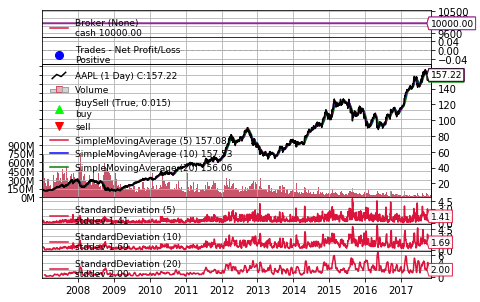

[[<matplotlib.figure.Figure at 0x21585f38908>]]

In [37]:
cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)

data = bt.feeds.YahooFinanceData(
    dataname='AAPL',
    fromdate=datetime(2007, 1, 1),
    todate=datetime(2017, 12, 31),
    reverse=False)
cerebro.adddata(data)
cerebro.broker.setcash(10000.0)

cerebro.addsizer(bt.sizers.PercentSizer, percents=5)
cerebro.broker.setcommission(commission=0.001)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()